# 1. Visualization to the business in Las Vegas and Toronro

In [259]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
vegas_csv_path = "./vegas/vegas_business.csv"
toronto_csv_path = "./toronto/toronto_business.csv"

In [260]:
df = pd.read_csv(vegas_csv_path)

In [261]:
df.columns

Index(['address', 'attributes', 'business_id', 'categories', 'city',
       'latitude', 'longitude', 'name', 'review_count', 'stars'],
      dtype='object')

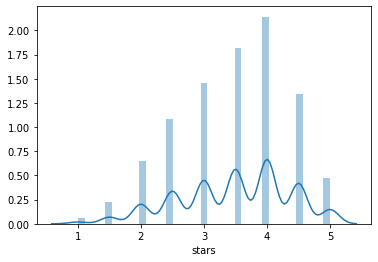

In [262]:
sns.distplot(df['stars']);

In [263]:
mean = df['stars'].mean()

In [264]:
median = df['stars'].median()

In [265]:
upper = df[df['stars'] >= mean]
lower = df[df['stars'] < mean]

In [266]:
verybad = df[df['stars'] <= 1]
bad = df[(df['stars'] > 1) & (df['stars'] <= 2)]
ok = df[(df['stars'] > 2) & (df['stars'] <= 3)]
good = df[(df['stars'] > 3) & (df['stars'] <= 4)]
verygood = df[df['stars'] > 4]

In [267]:
longitude_max = -114.9516
longitude_min = -115.3655
latitude_min = 36.0406
latitude_max = 36.3075

BBox = (longitude_min, longitude_max, latitude_min, latitude_max)

In [268]:
backimg = plt.imread("./Las_Vegas.png")

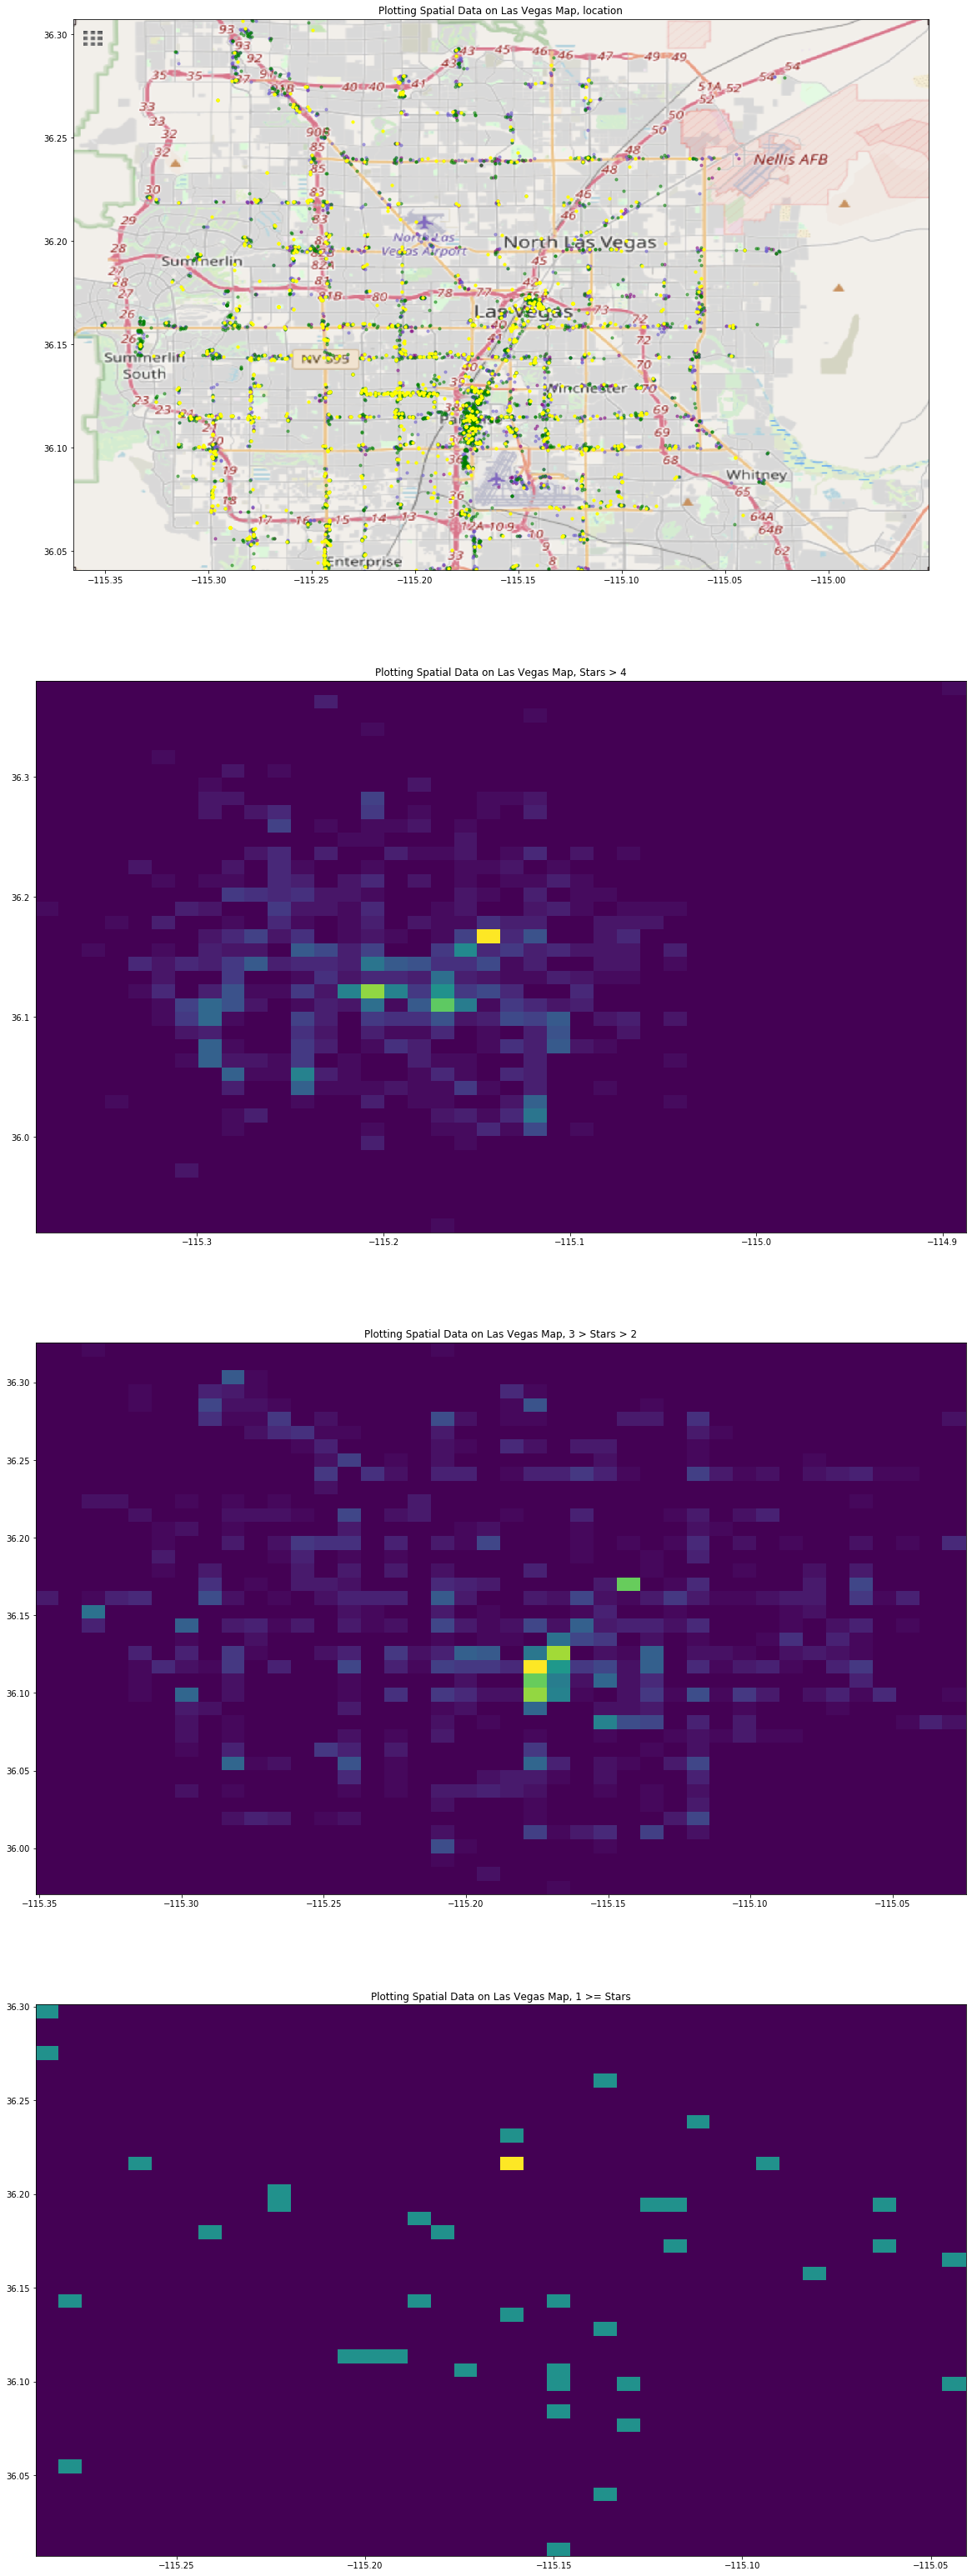

In [269]:
fig, ax = plt.subplots(4, 1, figsize = (20,56))
ax[0].set_title('Plotting Spatial Data on Las Vegas Map, location')
ax[0].scatter(verybad.longitude, verybad.latitude, zorder=1, alpha= 0., c='indigo', s=10)
ax[0].scatter(bad.longitude, bad.latitude, zorder=1, alpha= 0.5, c='purple', s=10)
ax[0].scatter(ok.longitude, ok.latitude, zorder=1, alpha= 0.5, c='slateblue', s=10)
ax[0].scatter(good.longitude, good.latitude, zorder=1, alpha= 0.5, c='green', s=10)
ax[0].scatter(verygood.longitude, verygood.latitude, zorder=1, alpha= 1, c='yellow', s=10)
ax[0].set_xlim(BBox[0],BBox[1])
ax[0].set_ylim(BBox[2],BBox[3])

ax[1].set_title('Plotting Spatial Data on Las Vegas Map, Stars > 4')
ax[1].set_xlim(BBox[0],BBox[1])
ax[1].set_ylim(BBox[2],BBox[3])
ax[1].hist2d(verygood['longitude'], verygood['latitude'], bins=40)

ax[2].set_title('Plotting Spatial Data on Las Vegas Map, 3 > Stars > 2')
ax[2].set_xlim(BBox[0],BBox[1])
ax[2].set_ylim(BBox[2],BBox[3])
ax[2].hist2d(ok['longitude'], ok['latitude'], bins=40)

ax[3].set_title('Plotting Spatial Data on Las Vegas Map, 1 >= Stars')
ax[3].set_xlim(BBox[0],BBox[1])
ax[3].set_ylim(BBox[2],BBox[3])
ax[3].hist2d(verybad['longitude'], verybad['latitude'], bins=40)

ax[0].imshow(backimg, zorder=0, extent = BBox, aspect= 'equal')

# Cluster the restaurants according to geo info

In [270]:
location = df[["longitude", "latitude"]].to_numpy()
data = df[["longitude", "latitude", "stars", "review_count"]]

In [271]:
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

## determine the best k value

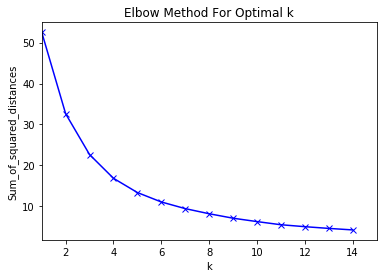

In [272]:
ks = list(range(1, 15, 1))
ssd = []
for k in range(1, 15, 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(location)
    ssd.append(kmeans.inertia_)

plt.plot(ks, ssd, 'bx-')
plt.xlim(1, 15)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## According to the elbow method, the best k is 5 or 6.
## We will take 6 this time as the cluster centers' number.

In [273]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(location)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [274]:
kmeans.cluster_centers_

array([[-115.17683244,   36.12333671],
       [-115.26098155,   36.06931369],
       [-115.21987393,   36.25488874],
       [-115.10078273,   36.16902737],
       [-115.14148391,   36.05047761],
       [-115.28248266,   36.15893643]])

In [275]:
kmeans.labels_

array([3, 3, 2, ..., 0, 4, 4], dtype=int32)

In [276]:
# squared sum of distance
kmeans.inertia_

11.135820116058254

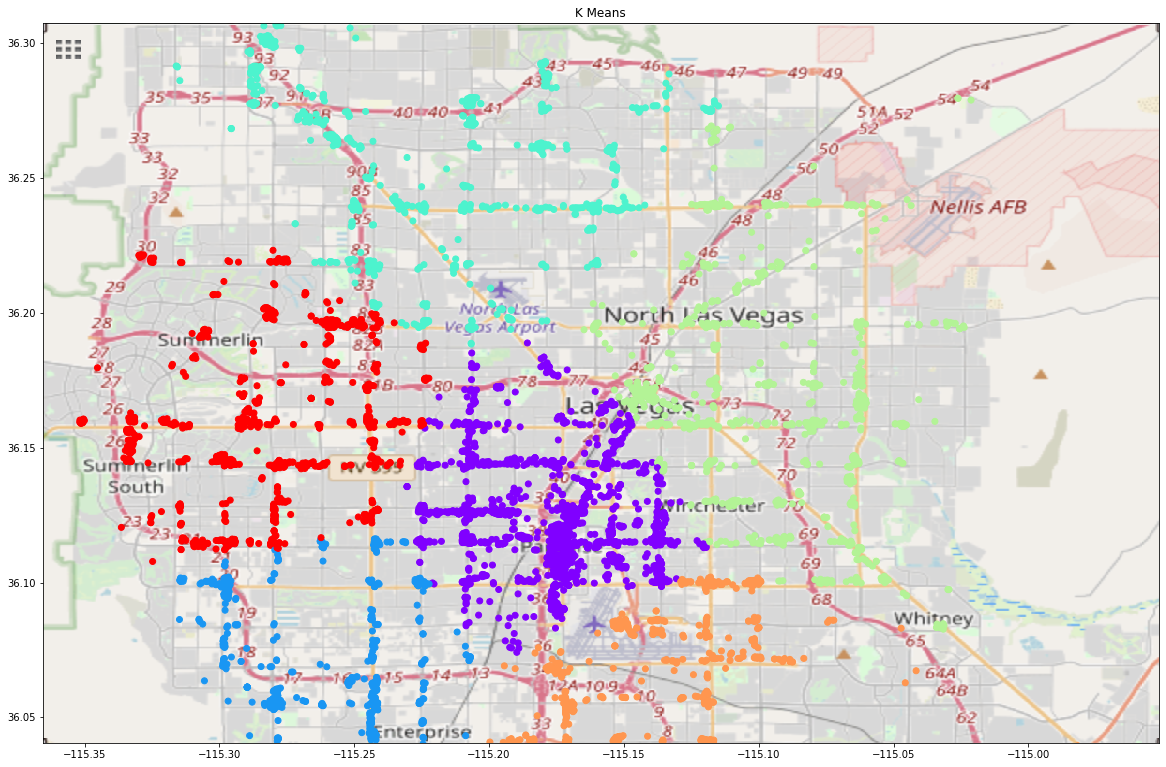

In [277]:
f, ax1 = plt.subplots(sharey=True,figsize=(20,14))
ax1.set_title('K Means')
ax1.scatter(location[:,0],location[:,1],c=kmeans.labels_, cmap='rainbow', alpha=1)
ax1.imshow(backimg, zorder=0, extent = BBox, aspect= 'equal')

In [284]:
labels=pd.Series(kmeans.labels_)
labels.to_frame(name='label').reset_index()

data_all = data.join(labels)

ValueError: Other Series must have a name